## Diabetes Prediction

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [10]:
# loading the dataset
df = pd.read_csv('diabetes.csv')

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.shape

(768, 9)

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,122.242188,69.662760,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,3.369578,49.001676,24.827374,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,1150.000000,500.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


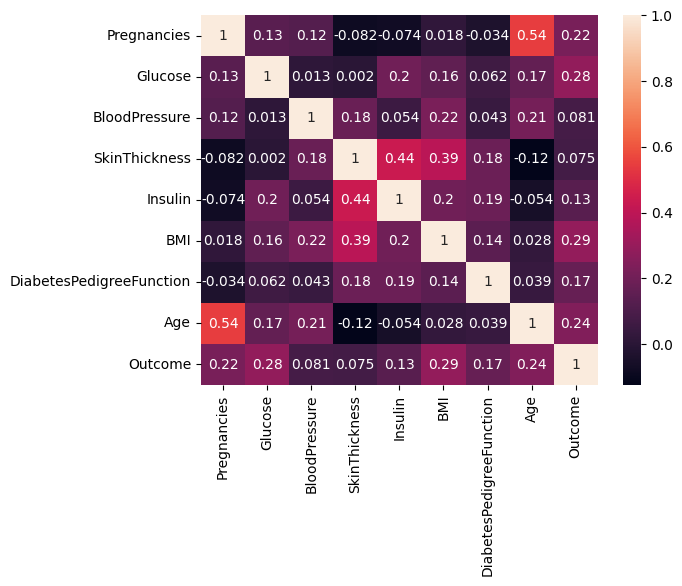

In [17]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [18]:
# Handling duplicate data
df = df.drop_duplicates()

In [19]:
# replacing zero value
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['Age'] = df['Age'].replace(0,df['Age'].median())

In [20]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [21]:
# divide the dataset into independent and dependent dataset
X = df.drop(columns='Outcome')
y = df['Outcome']
X.shape,y.shape

((768, 8), (768,))

In [22]:
data_columns = X.columns
data_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [23]:
numerical_pipeline = Pipeline(
        steps = [
            ('imputer',SimpleImputer(strategy = 'median')),
            ('scaler',StandardScaler())
        ]
)

In [24]:
preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,data_columns)
])

In [25]:
# splitting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 20)
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [26]:
y_train.shape,y_test.shape

((537,), (231,))

In [27]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
models = {
    'LogisticRegression':LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='lbfgs',
        max_iter=200),

    'RandomForestClassifier':RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        oob_score=True)
}

In [29]:
def model_evaluation(X_train,X_test,y_train,y_test,models):
    reports = {}

    for model_name,model in models.items():
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)

        accuracyScore = accuracy_score(y_test,y_test_pred)
        confusionMatrix = confusion_matrix(y_test,y_test_pred)
        classificationReport = classification_report(y_test,y_test_pred)

        reports[model_name] = [
            accuracyScore,
            confusionMatrix,
            classificationReport
        ]

    return reports

In [30]:
reports = model_evaluation(X_train,X_test,y_train,y_test,models)

In [31]:
for model_name,model_data in reports.items():
    print(f'Model : {model_name}')
    print(f'Accuracy score : {model_data[0]}')
    print(f'Confusion Matrix : \n{model_data[1]}')
    print(f'Classification Report : \n{model_data[2]}')

Model : LogisticRegression
Accuracy score : 0.7662337662337663
Confusion Matrix : 
[[136  17]
 [ 37  41]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       153
           1       0.71      0.53      0.60        78

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231

Model : RandomForestClassifier
Accuracy score : 0.7705627705627706
Confusion Matrix : 
[[132  21]
 [ 32  46]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.69      0.59      0.63        78

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.77      0.77       231



In [32]:
# parameter = {
#     'LogisticRegression':{
#         'penalty':('l1', 'l2', 'elasticnet', None),
#         'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
#         'C':(0.001, 0.01, 0.1, 1, 10, 100)
#     },

#     'RandomForestClassifier':{
#         'n_estimators':(50,100,200),
#         'criterion':('gini', 'entropy', 'log_loss'),
#         'max_features':('sqrt','log2',None)
#     }
# }

In [33]:
# def hyperparameter_tunning(X_train,X_test,y_train,y_test,models,parameter):
#     reports = {}

#     for model_name,model in models.items():
#         if model_name in parameter:
#             gscv = GridSearchCV(estimator = model,
#                                 param_grid = parameter[model_name],
#                                 cv = 10,
#                                 scoring = 'accuracy',
#                                 verbose = 3)
            
#             gscv.fit(X_train,y_train)
#             best_model = gscv.best_estimator_
#             accuracy = best_model.score(X_test,y_test)
#             predictions = best_model.predict(X_test)
#             confusion_matrix_result = confusion_matrix(y_test, predictions)
#             classification_report_result = classification_report(y_test, predictions)
            
#             reports[model_name] = {
#                 'best_params': gscv.best_params_,
#                 'best_score': gscv.best_score_,
#                 'test_accuracy': accuracy,
#                 'confusion_matrix': confusion_matrix_result,
#                 'classification_report': classification_report_result,
#                 'predictions': predictions
#             }

#     return reports

In [34]:
# reports = hyperparameter_tunning(X_train, X_test, y_train, y_test, models, parameter)

# for model_name, report in reports.items():
#     print(f"\nModel: {model_name}")
#     print(f"Best Parameters: {report['best_params']}")
#     print(f"Training Accuracy: {report['best_score']}")
#     print(f"Test Accuracy: {report['test_accuracy']}")
#     print(f"Confusion Matrix: {report['confusion_matrix']}")
#     print(f"Classification Report: {report['classification_report']}")
#     print(f"Predictions: {report['predictions']}")

In [35]:
# import pickle

# model_objects = {
#     'preprocessor': preprocessor,
#     'models': models
# }

# file = open('model_objects.pkl','wb')
# pickle.dump(model_objects,file)

# print("Model object saved in model_objects.pkl")

In [36]:
# file = open('model_objects.pkl','rb')
# model_objects = pickle.load(file)
# preprocessor = model_objects['preprocessor']
# models = model_objects['models']

In [37]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)